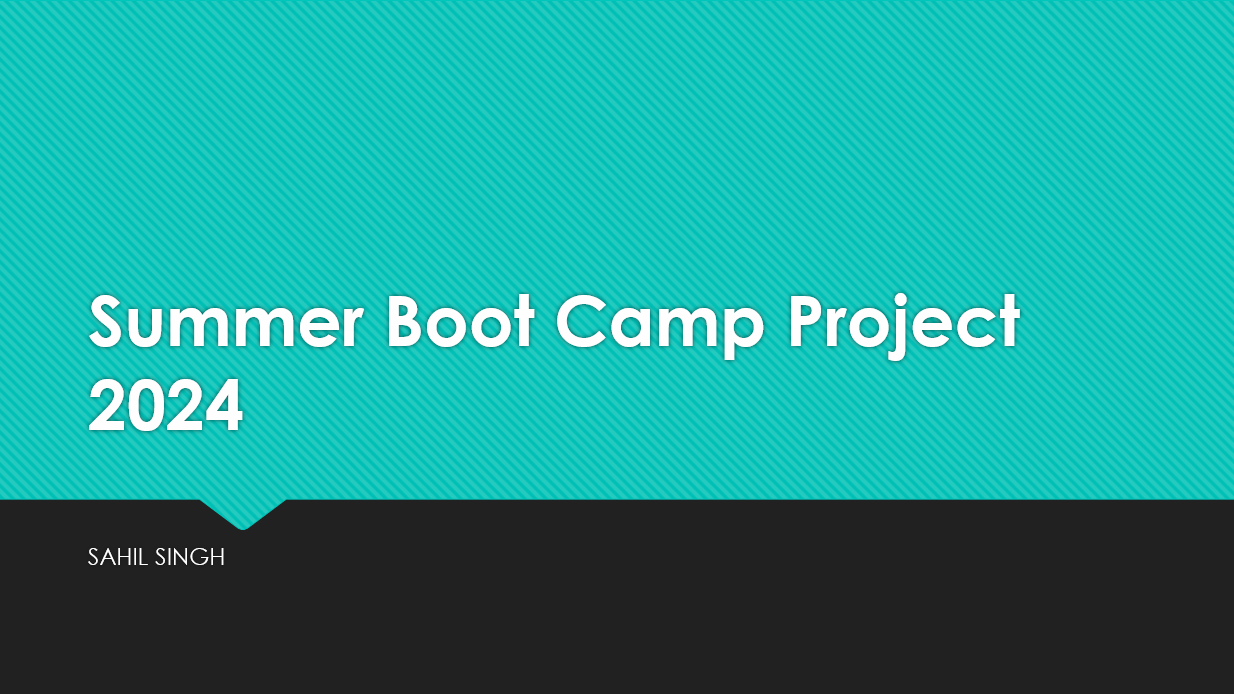


### INDEX


### List of Tables

### List of Figures

### Problem statment
Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description
* Age: The age of the individual in years.
* Gender: The gender of the individual, categorized as male or female.
* Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduateand Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* Make: The type of automobile
 of automobile

### Importing libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [28]:
data=pd.read_csv('5-bright_automotive_company_New.csv')

### 1.Display the top 5 rows

In [29]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


### 2.Display the last 5 rows

In [30]:
data.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.0,31600,31000,Hatchback


### 3.The shape of dataset.

In [31]:
data.shape

(1581, 14)

### 4.The datatypes of each feature

In [32]:
data.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

## Observation 
* Data Types of 'Total_Salary' and 'Price' is int, it should be float

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


### observation
* because of q mark its shows object in palce of int in No_of_Dependents
* NULL values in several columns.

In [34]:
data.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


### observation
* the min age 14 nad max age is 120 which seems wrong 

In [35]:
data['No_of_Dependents'].value_counts()

No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64

In [36]:
data['Make'].value_counts()

Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64

### 6.Null values

In [37]:
data.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### 7.duplicate values

In [38]:
data.duplicated().sum()

0

### 8.outliers

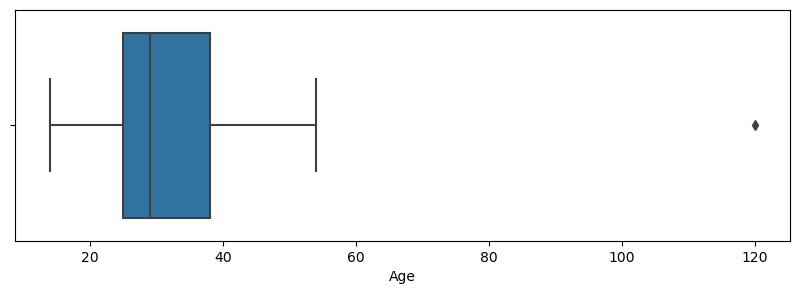

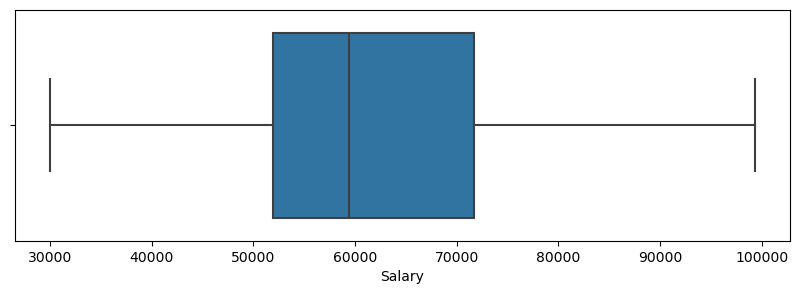

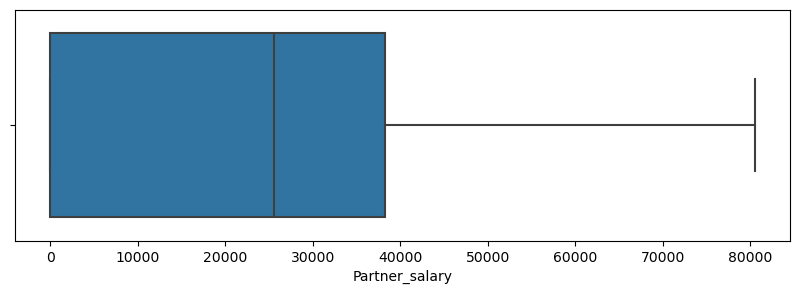

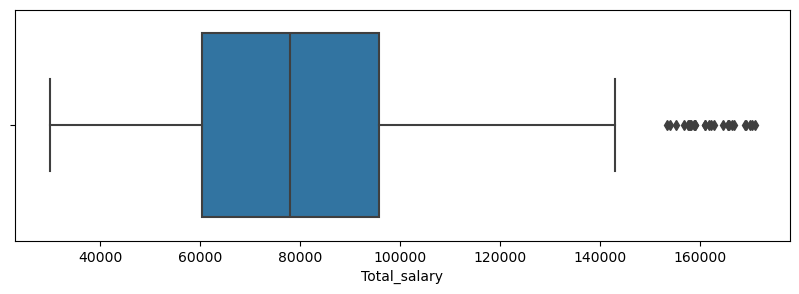

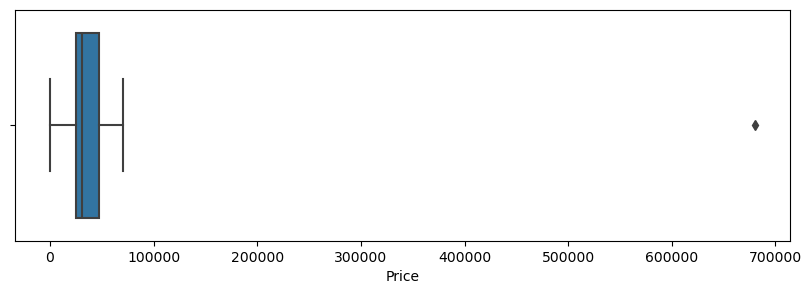

In [39]:
for i in ['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=data, x=i)

### Data cleaning

In [41]:
data['Total_salary']=data['Total_salary'].astype('float')
data['Price']=data['Price'].astype('float')

* Filling the null values by its median

In [43]:
value={'Age':data['Age'].median(),'Salary':data['Salary'].median(),'Partner_salary':data['Partner_salary'].median(),'Tota_salary':data['Total_salary'].median(),'Price':data['Price'].median()}
data.fillna(value=value, inplace=True)

In [44]:
data.isnull().sum()

Age                  0
Gender              53
Profession           6
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

In [45]:
data['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [46]:
data['Gender']=data['Gender'].replace('Femal','Female')
data['Gender']=data['Gender'].replace('Femle','Female')
data['No_of_Dependents']=data['No_of_Dependents'].replace('?',np.nan)
data['Make']=data['Make'].replace('?',np.nan)

* Filling the null values with mode

In [49]:
values={'Gender':data['Gender'].mode().values[0],'Profession':data['Profession'].mode().values[0],'No_of_Dependents':data['No_of_Dependents'].mode().values[0],'Make':data['Make'].mode().values[0]}
data.fillna(value=values,inplace=True)

In [50]:
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [52]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

In [53]:
llts,ults=remove_outliers(data['Total_salary'])
data['Total_salary']=np.where(data['Total_salary']>ults,ults,data['Total_salary'])
data['Total_salary']=np.where(data['Total_salary']<llts,llts,data['Total_salary'])

llp,ulp=remove_outliers(data['Price'])
data['Price']=np.where(data['Price']>ulp,ulp,data['Price'])
data['Price']=np.where(data['Price']<llp,llp,data['Price'])

lla,ula=remove_outliers(data['Age'])
data['Age']=np.where(data['Age']>ula,ula,data['Age'])
data['Age']=np.where(data['Age']<lla,lla,data['Age'])

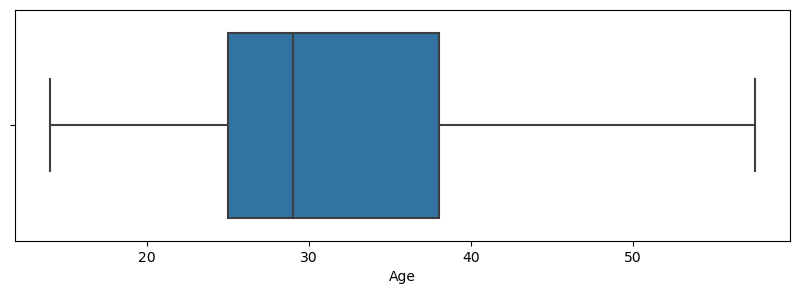

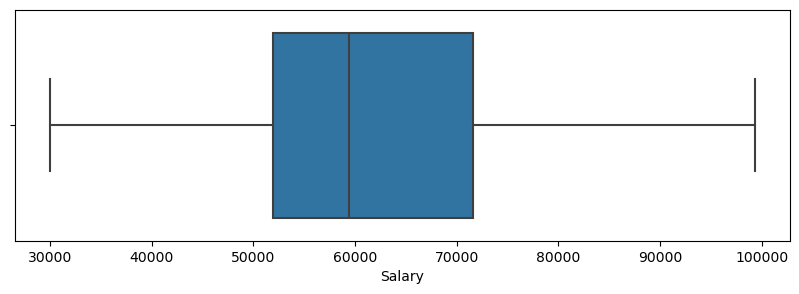

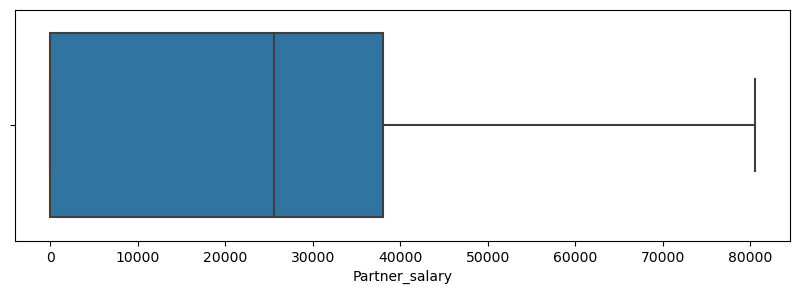

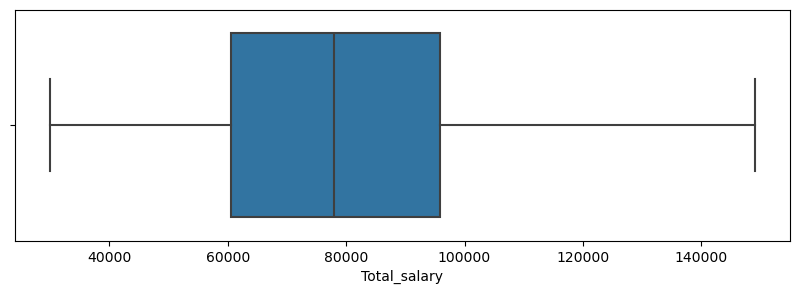

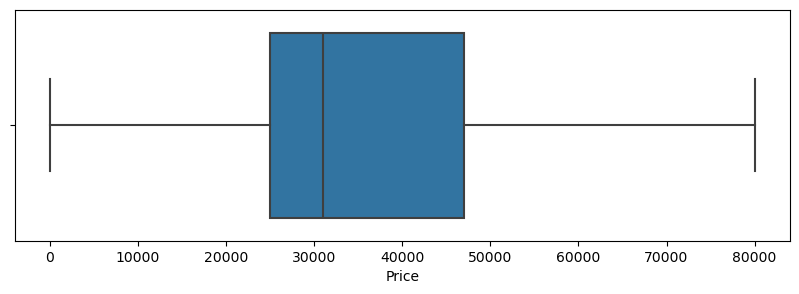

In [54]:
for i in ['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=data, x=i)

# Descriptive Statistics

	What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [55]:
data['Age'].mean()

31.91302972802024

The mean is 31.91302972802024

In [56]:
data['Age'].median()

29.0

The median is 29.0

In [57]:
data['Age'].std()

8.450649424059383

The standard deviation is 8.450649424059444

### Data Distribution

What is the distribution of gender in the dataset? Represent it using a pie chart.

In [59]:
data['Gender'].value_counts()


Gender
Male      1252
Female     329
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f97435ed50>,
 [Text(-0.8731874085181974, 0.6689871072040736, 'Male'),
  Text(0.8731874085181974, -0.6689871072040737, 'Female')])

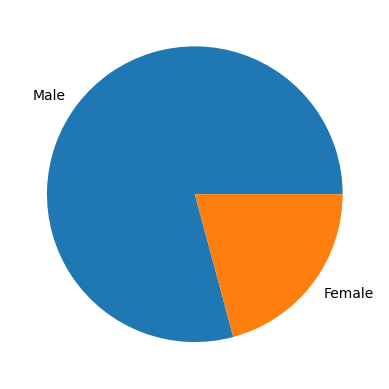

In [60]:
plt.pie(data=data,x=data['Gender'].value_counts().values,labels=data['Gender'].value_counts().index)

# Correlation Analysis
*Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [63]:
data[['Age','Salary']].corr()


,Age,Salary
Age,1.000000,0.599922
Salary,0.599922,1.000000


The correlation coefficient is 0.599922.

This means that Age and Salary are not related to each other significantly.

# Salary Analysis

o	What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

<Axes: xlabel='Education', ylabel='Salary'>

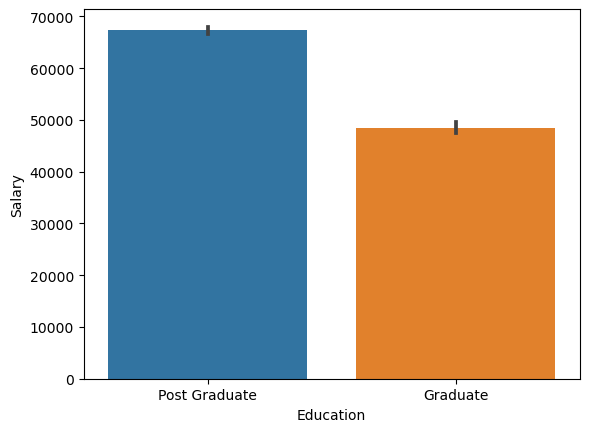

In [64]:
sns.barplot(data=data,x=data['Education'],y=data['Salary'])

In [67]:
data.groupby('Education')['Salary'].mean()

Education
Graduate         48514.597315
Post Graduate    67383.096447
Name: Salary, dtype: float64

# Loan Status

o	What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [69]:
data['Personal_loan'].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
data['Personal_loan'][data['Personal_loan']=='Yes'].value_counts().sum()/len(data['Personal_loan'])*100

50.094876660341555

The percentage of people who have taken a personal loan is 50.094876660341555


In [71]:
data.groupby('Gender')['Personal_loan'].value_counts()

Gender  Personal_loan
Female  No               180
        Yes              149
Male    Yes              643
        No               609
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f97463df90>,
 [Text(-0.9134026721403921, 0.6129400937504348, 'Male'),
  Text(0.9134026434465944, -0.6129401365098992, 'Female')])

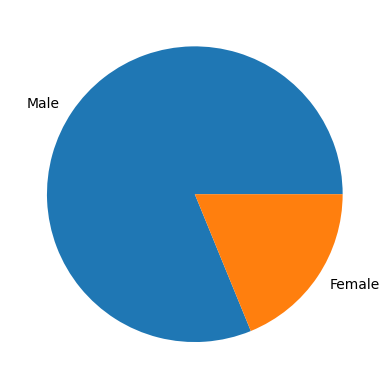

In [72]:
plt.pie(data=data,x=data['Gender'][data['Personal_loan']=='Yes'].value_counts(),labels=data['Gender'].value_counts().index)

Males have taken more Personal Loans than Females.

# Marital Status and Dependents

o	What is the average number of dependents for married individuals versus single individuals

In [134]:
data.groupby('Marital_status')['No_of_Dependents'].mean()

Marital_status
Married    2.539155
Single     1.608696
Name: No_of_Dependents, dtype: float64

<Axes: xlabel='Marital_status', ylabel='No_of_Dependents'>

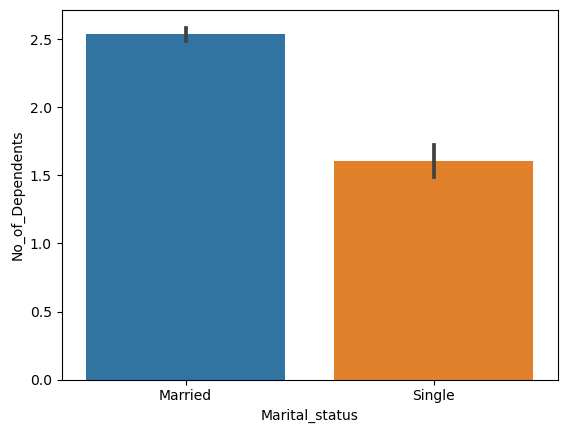

In [135]:
sns.barplot(data=data,x=data['Marital_status'],y=data['No_of_Dependents'])

# Partner Employment

o	How does the employment status of a partner affect the total combined salary?

In [77]:
data.groupby('Partner_working')['Total_salary'].mean()

Partner_working
No     60527.208976
Yes    94900.000000
Name: Total_salary, dtype: float64

The total salary is more in cases where the partner is working.

<Axes: xlabel='Partner_working', ylabel='Total_salary'>

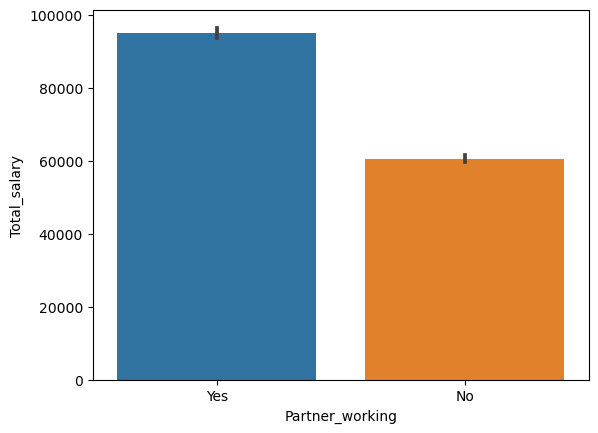

In [78]:
sns.barplot(data=data, x=data['Partner_working'], y=data['Total_salary'])

# Salary Comparison

o	Compare the average salary of individuals whose partners are working versus those whose partners are not working.

In [79]:
data.groupby('Partner_working')['Salary'].mean()

Partner_working
No     60256.451613
Yes    60281.336406
Name: Salary, dtype: float64

<Axes: xlabel='Partner_working', ylabel='Salary'>

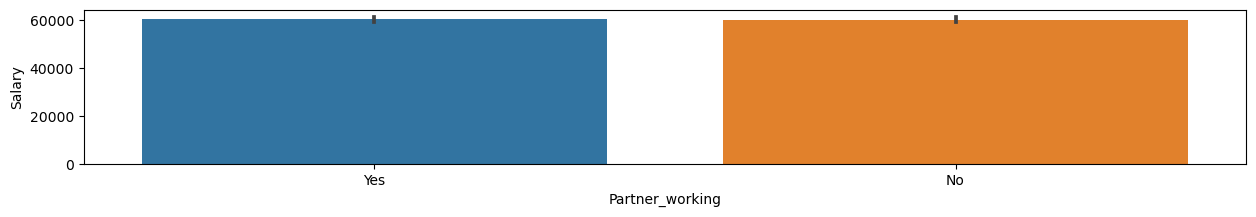

In [81]:
plt.figure(figsize=(15,2))
sns.barplot(data=data, y=data['Salary'],x=data['Partner_working'])

Average salary is slightly more in the case where the partner is working.

# House Loan Analysis

o	What is the proportion of individuals with house loans based on their profession?

In [82]:
data['House_loan'].unique()
data.groupby('Profession')['House_loan'].value_counts()


Profession  House_loan
Business    No            456
            Yes           229
Salaried    No            598
            Yes           298
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f974625f90>,
 [Text(-0.224639032124037, 1.07681813935612, 'Salaried'),
  Text(0.22463913294302593, -1.0768181183238912, 'Business')])

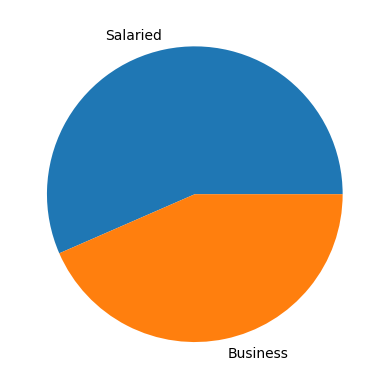

In [83]:
plt.pie(data=data, x=data['Profession'][data['House_loan']=='Yes'].value_counts(), labels=data['Profession'].value_counts().index)

People who are salaried have taken more House Loans than people who are salaried.

# Salary Distribution

o	What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.

In [86]:
data.groupby('Personal_loan')['Salary'].value_counts()

Personal_loan  Salary 
No             65500.0    6
               56400.0    6
               76300.0    6
               56000.0    6
               62700.0    6
                         ..
Yes            39900.0    1
               31500.0    1
               31000.0    1
               30100.0    1
               99300.0    1
Name: count, Length: 817, dtype: int64

<Axes: xlabel='Personal_loan', ylabel='Salary'>

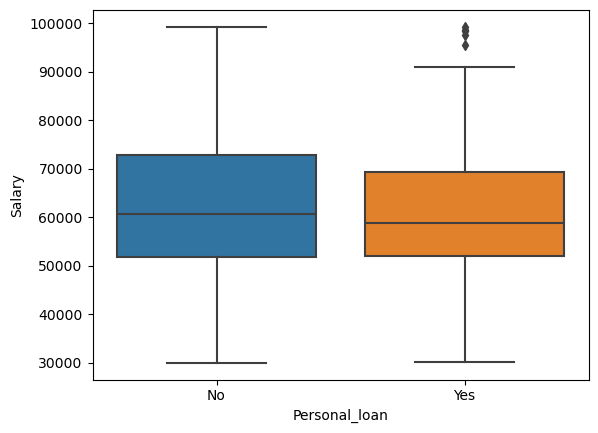

In [87]:
sns.boxplot(data=data, x=data['Personal_loan'],y=data['Salary'])

Salary of people with no personal loan is on average greater than those with personal loans. Although there are a few people with high salaries who have a personal loan.

# Automobile Make Analysis:

o	How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.

In [90]:
data.groupby('Make')['Salary'].mean()

Make
Hatchback    55083.505155
SUV          71642.203390
Sedan        59792.613636
Name: Salary, dtype: float64

<Axes: xlabel='Make', ylabel='Salary'>

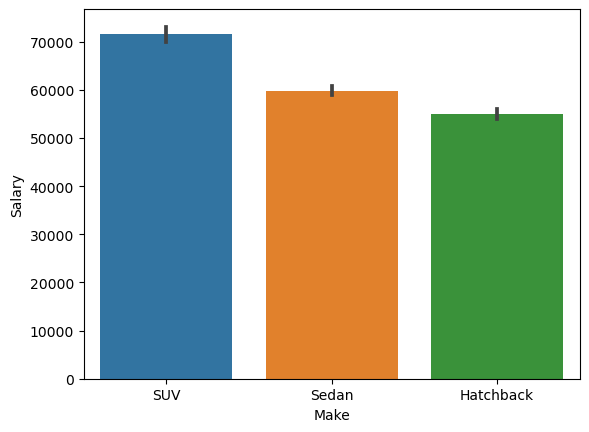

In [91]:
sns.barplot(data=data,x=data['Make'],y=data['Salary'])

People who have SUVs have the highest salaries on average. Sedan Makes are a second while Hatchbacks are the lowest.

# Price Analysis

o	What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

In [93]:
data['Price'].mean()

35568.66413662239

In [94]:
data[['Price','Total_salary']].corr()

,Price,Total_salary
Price,1.000000,0.358806
Total_salary,0.358806,1.000000


<Axes: >

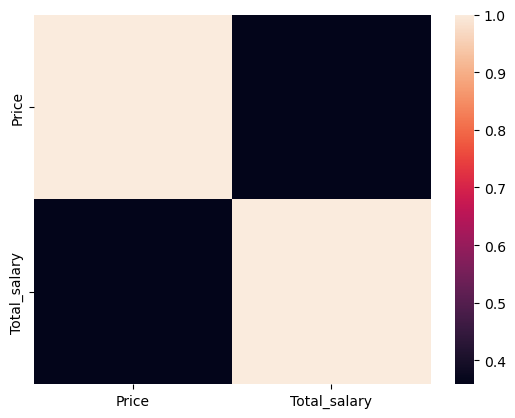

In [95]:
sns.heatmap(data=data[['Price','Total_salary']].corr())

# Marital Status and Loans

o	Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?

In [96]:
data['Marital_status'][data['Personal_loan']=='Yes'].value_counts()

Marital_status
Married    720
Single      72
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f979af9650>,
 [Text(-1.055442297353649, 0.30990572269135613, 'Married'),
  Text(1.0554423263691122, -0.30990562387371495, 'Single')])

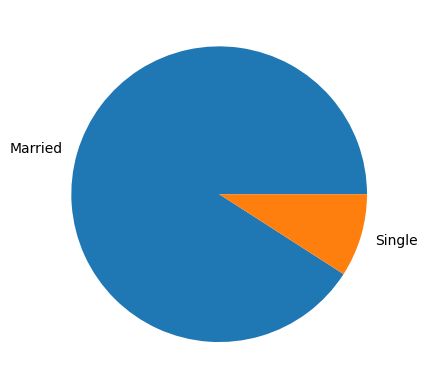

In [97]:
plt.pie(data=data,x=data['Marital_status'][data['Personal_loan']=='Yes'].value_counts().values, labels=data['Marital_status'].value_counts().index)

There is a significant difference. People who have married have taken more personal loans than people who are single.

# Educational Qualification Impact

o	How does educational qualification impact the likelihood of taking a house loan?

In [105]:
data.groupby('Education')['House_loan'].value_counts()

Education      House_loan
Graduate       No            394
               Yes           202
Post Graduate  No            660
               Yes           325
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f979bd2b10>,
 [Text(-0.39430668605074354, 1.0268993316463306, 'Post Graduate'),
  Text(0.39430658990548706, -1.0268993685639827, 'Graduate')])

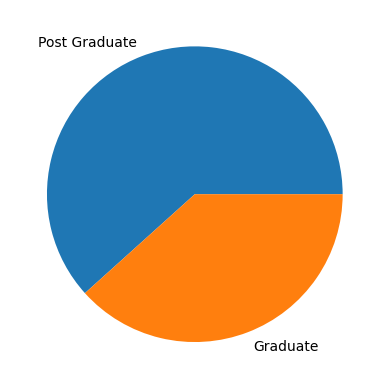

In [104]:
plt.pie(data=data,x=data['Education'][data['House_loan']=='Yes'].value_counts().values, labels=data['Education'].value_counts().index)

# Dependency count Analysis
o	Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?

In [109]:
data['No_of_Dependents'].value_counts()

No_of_Dependents
3    559
2    556
1    229
4    217
0     20
Name: count, dtype: int64

In [119]:
data.groupby('Profession')['No_of_Dependents'].value_counts()

Profession  No_of_Dependents
Business    3                   249
            2                   245
            4                    96
            1                    85
            0                    10
Salaried    2                   311
            3                   310
            1                   144
            4                   121
            0                    10
Name: count, dtype: int64

In [124]:
data['No_of_Dependents']=data['No_of_Dependents'].astype('int')

In [133]:
data.groupby('Profession')['No_of_Dependents'].mean()

Profession
Business    2.490511
Salaried    2.433036
Name: No_of_Dependents, dtype: float64

<Axes: xlabel='Profession', ylabel='No_of_Dependents'>

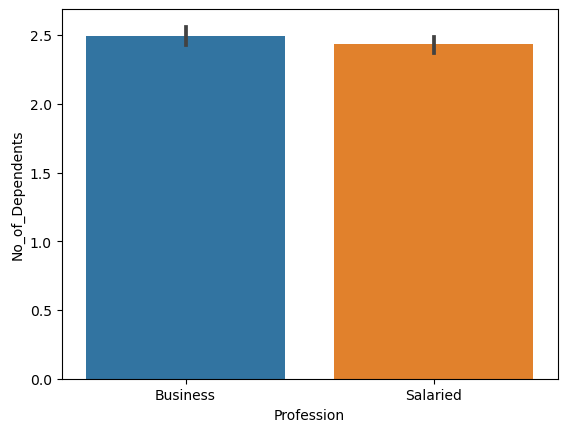

In [132]:
sns.barplot(data=data,x=data['Profession'],y=data['No_of_Dependents'])